<a href="https://colab.research.google.com/github/Alyssonmach/9-Data-Science-Apps-with-Python/blob/main/pending/pneumothorax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf
import urllib.request as url

import warnings
warnings.filterwarnings("ignore")

In [2]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if 'GPU' not in device_name:
  print('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [3]:
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

In [5]:
train_df = pd.read_csv('/content/drive/MyDrive/train_df.csv', sep = ',', index_col = 0)
validation_df = pd.read_csv('/content/drive/MyDrive/validation_df.csv', sep = ',', index_col = 0)
test_df = pd.read_csv('/content/drive/MyDrive/test_df.csv', sep = ',', index_col = 0)

In [6]:
train_df = train_df[train_df.finding_labels != 'No Finding']
validation_df = validation_df[validation_df.finding_labels != 'No Finding']
test_df = test_df[test_df.finding_labels != 'No Finding']

In [7]:
infiltration, _ = train_test_split(train_df[train_df.finding_labels == 'Infiltration'], test_size = 0.94)
atelectasis, _ = train_test_split(train_df[train_df.finding_labels == 'Atelectasis'], test_size = 0.85)
effusion, _ = train_test_split(train_df[train_df.finding_labels == 'Effusion'], test_size = 0.85)
nodule, _ = train_test_split(train_df[train_df.finding_labels == 'Nodule'], test_size = 0.78)
pneumothorax, _ = train_test_split(train_df[train_df.finding_labels == 'Pneumothorax'], test_size = 0.72)
consolidation, _ = train_test_split(train_df[train_df.finding_labels == 'Consolidation'], test_size = 0.55)
pleural_thickening, _ = train_test_split(train_df[train_df.finding_labels == 'Pleural_Thickening'], test_size = 0.45)
emphysema, _ = train_test_split(train_df[train_df.finding_labels == 'Emphysema'], test_size = 0.32)
fibrosis, _ = train_test_split(train_df[train_df.finding_labels == 'Fibrosis'], test_size = 0.16)  
edema = train_df[train_df.finding_labels == 'Edema']   
train_df = pd.concat([infiltration, atelectasis, effusion, nodule, pneumothorax, consolidation,
                   pleural_thickening, emphysema, fibrosis, edema])
train_df['finding_labels'].value_counts()      

Atelectasis           585
Edema                 578
Pneumothorax          566
Pleural_Thickening    565
Fibrosis              563
Emphysema             556
Consolidation         550
Nodule                549
Effusion              546
Infiltration          526
Name: finding_labels, dtype: int64

In [8]:
infiltration, _ = train_test_split(validation_df[validation_df.finding_labels == 'Infiltration'], test_size = 0.94)
atelectasis, _ = train_test_split(validation_df[validation_df.finding_labels == 'Atelectasis'], test_size = 0.85)
effusion, _ = train_test_split(validation_df[validation_df.finding_labels == 'Effusion'], test_size = 0.85)
nodule, _ = train_test_split(validation_df[validation_df.finding_labels == 'Nodule'], test_size = 0.78)
pneumothorax, _ = train_test_split(validation_df[validation_df.finding_labels == 'Pneumothorax'], test_size = 0.72)
consolidation, _ = train_test_split(validation_df[validation_df.finding_labels == 'Consolidation'], test_size = 0.55)
pleural_thickening, _ = train_test_split(validation_df[validation_df.finding_labels == 'Pleural_Thickening'], test_size = 0.45)
emphysema, _ = train_test_split(validation_df[validation_df.finding_labels == 'Emphysema'], test_size = 0.32)
fibrosis, _ = train_test_split(validation_df[validation_df.finding_labels == 'Fibrosis'], test_size = 0.16)  
edema = validation_df[validation_df.finding_labels == 'Edema']   
validation_df = pd.concat([infiltration, atelectasis, effusion, nodule, pneumothorax, consolidation,
                   pleural_thickening, emphysema, fibrosis, edema])
validation_df['finding_labels'].value_counts()      

Edema                 35
Pleural_Thickening    31
Emphysema             31
Atelectasis           29
Effusion              29
Infiltration          29
Fibrosis              28
Nodule                26
Pneumothorax          25
Consolidation         24
Name: finding_labels, dtype: int64

In [9]:
infiltration, _ = train_test_split(test_df[test_df.finding_labels == 'Infiltration'], test_size = 0.94)
atelectasis, _ = train_test_split(test_df[test_df.finding_labels == 'Atelectasis'], test_size = 0.85)
effusion, _ = train_test_split(test_df[test_df.finding_labels == 'Effusion'], test_size = 0.85)
nodule, _ = train_test_split(test_df[test_df.finding_labels == 'Nodule'], test_size = 0.78)
pneumothorax, _ = train_test_split(test_df[test_df.finding_labels == 'Pneumothorax'], test_size = 0.72)
consolidation, _ = train_test_split(test_df[test_df.finding_labels == 'Consolidation'], test_size = 0.55)
pleural_thickening, _ = train_test_split(test_df[test_df.finding_labels == 'Pleural_Thickening'], test_size = 0.45)
emphysema, _ = train_test_split(test_df[test_df.finding_labels == 'Emphysema'], test_size = 0.32)
fibrosis, _ = train_test_split(test_df[test_df.finding_labels == 'Fibrosis'], test_size = 0.16)  
edema = test_df[test_df.finding_labels == 'Edema']   
test_df = pd.concat([infiltration, atelectasis, effusion, nodule, pneumothorax, consolidation,
                   pleural_thickening, emphysema, fibrosis, edema])
test_df['finding_labels'].value_counts()      

Pleural_Thickening    22
Pneumothorax          22
Emphysema             19
Nodule                18
Fibrosis              18
Atelectasis           17
Infiltration          17
Effusion              16
Edema                 15
Consolidation         13
Name: finding_labels, dtype: int64

In [10]:
pneumothorax = train_df[train_df.finding_labels == 'Pneumothorax']
pneumothorax['class_name'] =  1
others = train_df[train_df.finding_labels != 'Pneumothorax']
others = train_df[train_df.finding_labels != 'No finding']
others['class_name'] = 0
others , _ = train_test_split(others, test_size = 0.9, random_state = 42, 
                               shuffle = True, stratify = others['finding_labels'])
train_df_ = pd.concat([pneumothorax, others])

In [11]:
pneumothorax = validation_df[validation_df.finding_labels == 'Pneumothorax']
pneumothorax['class_name'] =  1
others = validation_df[validation_df.finding_labels != 'Pneumothorax']
others = validation_df[validation_df.finding_labels != 'No finding']
others['class_name'] = 0
others , _ = train_test_split(others, test_size = 0.9, random_state = 42, 
                               shuffle = True, stratify = others['finding_labels'])
validation_df_ = pd.concat([pneumothorax, others])

In [12]:
pneumothorax = test_df[test_df.finding_labels == 'Pneumothorax']
pneumothorax['class_name'] =  1
others = test_df[test_df.finding_labels != 'Pneumothorax']
others = test_df[test_df.finding_labels != 'No finding']
others['class_name'] = 0
others , _ = train_test_split(others, test_size = 0.9, random_state = 42, 
                               shuffle = True, stratify = others['finding_labels'])
test_df_ = pd.concat([pneumothorax, others])

In [21]:
image_generator = ImageDataGenerator(rescale = 1/255, samplewise_center = True, 
                                     samplewise_std_normalization = True,
                                     horizontal_flip = True,
                                     vertical_flip = False,
                                     height_shift_range = 0.05,
                                     width_shift_range = 0.1,
                                     rotation_range = 5,
                                     shear_range = 0.1,
                                     fill_mode = 'reflect',
                                     zoom_range = 0.15)

train_generator = image_generator.flow_from_dataframe(
                                                      dataframe = train_df_,
                                                      directory = '',
                                                      x_col = 'Image Index',
                                                      y_col = 'class_name',
                                                      batch_size = 32,
                                                      seed = 42,
                                                      shuffle = True,
                                                      class_mode = 'raw',
                                                      target_size = (256, 256))

test_datagen = ImageDataGenerator(samplewise_center = True, 
                                  samplewise_std_normalization = True)

valid_generator = test_datagen.flow_from_dataframe(
                                                      dataframe = validation_df_,
                                                      directory = '.', 
                                                      x_col = 'Image Index',
                                                      y_col = 'class_name',
                                                      batch_size = 32,
                                                      seed = 42,
                                                      shuffle = True,
                                                      class_mode = 'raw',
                                                      target_size = (256, 256))

test_generator = test_datagen.flow_from_dataframe(
                                                  dataframe = test_df_, 
                                                  directory = '.',
                                                  x_col = 'Image Index',
                                                  y_col = 'class_name',
                                                  batch_size = 32,
                                                  seed = 42,
                                                  shuffle = True,
                                                  class_mode = 'raw',
                                                  target_size = (256, 256))

Found 1124 validated image filenames.
Found 53 validated image filenames.
Found 39 validated image filenames.


In [17]:
model = MobileNetV2(input_shape = (256, 256, 3), include_top = False, weights = 'imagenet')
x = tf.keras.layers.GlobalAveragePooling2D()(model.output)
x = tf.keras.layers.Dense(units = 1, activation = 'sigmoid')(x)

model = tf.keras.models.Model(inputs = model.input, outputs = x)

9412608/9406464 [==============================] - 0s 0us/step


In [18]:
filepath = "/content/drive/MyDrive/experimentos/multilabel/pneumothorax/transferlearning_weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor = 'val_acc', verbose = 1, save_best_only = True, mode = 'max')

In [19]:
callbacks = [checkpoint]

In [20]:
model.compile(optimizer = optimizers.RMSprop(learning_rate = 0.0001), loss = 'binary_crossentropy', 
              metrics = ['acc'])

In [22]:
history = model.fit(train_generator, steps_per_epoch = 1124 // 32, 
                    validation_data = valid_generator, validation_steps = 53 // 32,
                    callbacks = callbacks, epochs = 20)

Epoch 1/20
35/35 [==============================] - 809s 22s/step - loss: 0.7177 - acc: 0.5419 - val_loss: 0.8105 - val_acc: 0.5000

Epoch 00001: val_acc improved from -inf to 0.50000, saving model to /content/drive/MyDrive/experimentos/multilabel/pneumothorax/transferlearning_weights.hdf5
Epoch 2/20
35/35 [==============================] - 31s 885ms/step - loss: 0.6004 - acc: 0.6705 - val_loss: 0.7658 - val_acc: 0.5000

Epoch 00002: val_acc did not improve from 0.50000
Epoch 3/20
35/35 [==============================] - 31s 889ms/step - loss: 0.5688 - acc: 0.6899 - val_loss: 0.7297 - val_acc: 0.6250

Epoch 00003: val_acc improved from 0.50000 to 0.62500, saving model to /content/drive/MyDrive/experimentos/multilabel/pneumothorax/transferlearning_weights.hdf5
Epoch 4/20
35/35 [==============================] - 31s 911ms/step - loss: 0.5463 - acc: 0.7319 - val_loss: 0.7246 - val_acc: 0.5000

Epoch 00004: val_acc did not improve from 0.62500
Epoch 5/20
35/35 [============================

In [23]:
history = model.fit(train_generator, steps_per_epoch = 1124 // 32, 
                    validation_data = valid_generator, validation_steps = 53 // 32,
                    callbacks = callbacks, epochs = 10)

Epoch 1/10
35/35 [==============================] - 31s 887ms/step - loss: 0.2188 - acc: 0.9057 - val_loss: 0.7781 - val_acc: 0.6562

Epoch 00001: val_acc did not improve from 0.68750
Epoch 2/10
35/35 [==============================] - 30s 863ms/step - loss: 0.2019 - acc: 0.9130 - val_loss: 1.2496 - val_acc: 0.6250

Epoch 00002: val_acc did not improve from 0.68750
Epoch 3/10
35/35 [==============================] - 30s 867ms/step - loss: 0.2195 - acc: 0.9066 - val_loss: 1.1333 - val_acc: 0.5938

Epoch 00003: val_acc did not improve from 0.68750
Epoch 4/10
35/35 [==============================] - 30s 861ms/step - loss: 0.2266 - acc: 0.9158 - val_loss: 0.7522 - val_acc: 0.7812

Epoch 00004: val_acc improved from 0.68750 to 0.78125, saving model to /content/drive/MyDrive/experimentos/multilabel/pneumothorax/transferlearning_weights.hdf5
Epoch 5/10
35/35 [==============================] - 32s 922ms/step - loss: 0.1789 - acc: 0.9259 - val_loss: 0.9113 - val_acc: 0.7188

Epoch 00005: val_ac

In [25]:
model.load_weights('/content/drive/MyDrive/experimentos/multilabel/pneumothorax/transferlearning_weights.hdf5')
model.evaluate(test_generator)

2/2 [==============================] - 1s 89ms/step - loss: 0.8338 - acc: 0.5897


[0.8338368535041809, 0.5897436141967773]

In [26]:
model.save('/content/drive/MyDrive/experimentos/multilabel/pneumothorax/model1')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/experimentos/multilabel/pneumothorax/model1/assets


In [27]:
(x,y) = test_generator[0]

In [28]:
predict = model.predict(x)

In [29]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix

def thresholds(limiar, predict):
  '''predição para diferentes thresholds'''

  predict_ = []
  for i in predict:
    if i > limiar:
      predict_.append(1)
    else:
      predict_.append(0)
  
  return predict_

def precision_recall_accuracy_curve(predict, y):
  ''' Relaciona a curva da Precisão, Sensibilidade e Acurácia em relação a diferentes Thresholds'''

  limiares = np.arange(0, 1, 0.05)
  predicts = []
  precisions = []
  recalls = []
  accuracy = []
  flag = 0
  for i in limiares:
    predicts.append(thresholds(i, predict))
    precisions.append(precision_score(predicts[flag], y))
    recalls.append(recall_score(predicts[flag], y))
    accuracy.append(accuracy_score(predicts[flag], y))
    flag += 1
  
  return precisions, recalls, accuracy

def plot_precision_recall_accuracy_curve(precisions, recalls, accuracy):
  '''Plotando a curva de Precisão, Sensibilidade e Acurácia'''

  plt.figure(figsize = (10,5))
  plt.plot(np.arange(0, 1, 0.05), precisions, label = 'Precision')
  plt.plot(np.arange(0, 1, 0.05), recalls, label = 'Recall')
  plt.plot(np.arange(0, 1, 0.05), accuracy, label = 'Accuracy')
  plt.title('Precisão, Sensibilidade e Acurácia para diferentes Thresholds')
  plt.xlabel('Thresholds')
  plt.legend()
  plt.savefig('curve-analysis')

  return None

def best_metrics(threshold, predict, y):
  '''Melhores valores para o threshold escolhido'''

  predict_ = thresholds(threshold, predict)
  print('Matriz de Confusão:\n', confusion_matrix(predict_, y))
  print('Acurácia:', accuracy_score(predict_, y))
  print('Precisão', precision_score(predict_, y))
  print('Sensibilidade:', recall_score(predict_, y)) 
  print('F1_Score:', f1_score(predict_, y))

  return None

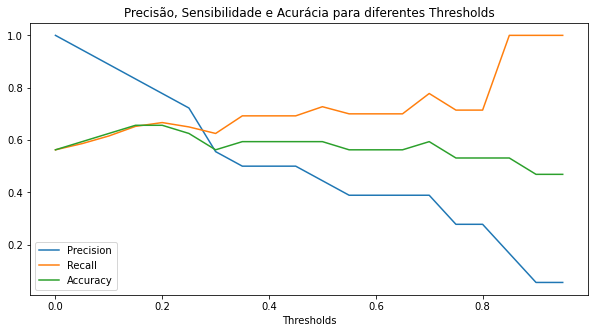

In [30]:
# plotando a curva da Precisão, Sensibilidade e Acurácia 
precisions, recalls, accuracy = precision_recall_accuracy_curve(predict, y)
plot_precision_recall_accuracy_curve(precisions, recalls, accuracy)

In [31]:
# analisando as melhores métricas encontradas para o modelo
best_metrics(threshold = 0.18, predict = predict, y = y)

Matriz de Confusão:
 [[ 7  3]
 [ 7 15]]
Acurácia: 0.6875
Precisão 0.8333333333333334
Sensibilidade: 0.6818181818181818
F1_Score: 0.7499999999999999


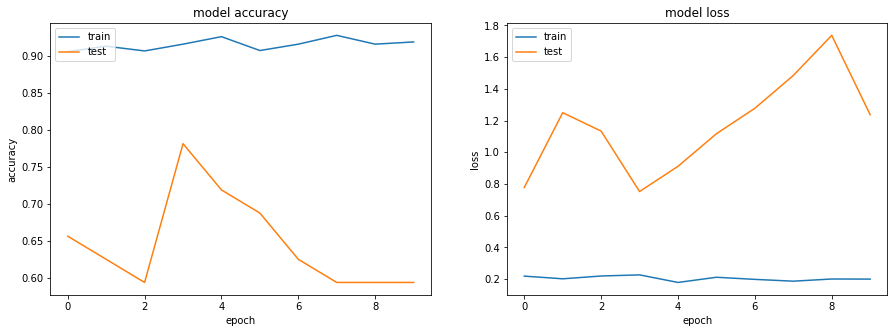

In [32]:
# visualizando o ganho de acurácia durante o treinamento
plt.figure(figsize = (15,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('model-accuracy')

# visualizando o decaimento da função de custo durante o treinamento 
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('model-loss')